In [ ]:
import pandas as pd
import numpy as np
import re

Read data

In [ ]:
pdDD=pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/30_heurMercedes.csv')
pdAP=pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/30_heurMercedes_AP.csv')
pdNC=pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/30_heurMercedes_NC.csv')

In [ ]:
# Rimuovi duplicati mantenendo solo l'ultimo elemento per ogni valore di 'instance'
display(pdNC[pdNC['instance'] == "grid0"])
pdDD = pdDD.drop_duplicates(subset='instance', keep='last')
pdAP = pdAP.drop_duplicates(subset='instance', keep='last')
pdNC = pdNC.drop_duplicates(subset='instance', keep='last')

,instance,timeLim,opt,totalTime,bestTime,nIter,optIter
89,grid0,30,5.426075,24.711527,10.037824,4,2
367,grid0,30,2.473684,43.753292,1.108684,7,1


Generate latex with name, the information in the csv

In [ ]:
#NC
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/TimesNC.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdNC.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#AP
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/TimesAP.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdAP.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#Drift and delay

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/TimesDD.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDD.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|"))
    f.write("\\end{document}")

### Creazioni di sotto dataframe per tipologia e per tini

#### drift and delay dataframe

In [ ]:
#drift and delay merged
#airport
df_air01=pdDD[pdDD["instance"].str.contains(r"airport\d+nDr0nDe1")]
df_air02=pdDD[pdDD["instance"].str.contains(r"airport\d+nDr0nDe2")]
df_air03=pdDD[pdDD["instance"].str.contains(r"airport\d+nDr0nDe3")]
#grid
df_grid01=pdDD[pdDD["instance"].str.contains(r"grid\d+nDr0nDe1")]
df_grid02=pdDD[pdDD["instance"].str.contains(r"grid\d+nDr0nDe2")]
df_grid03=pdDD[pdDD["instance"].str.contains(r"grid\d+nDr0nDe3")]
#metroplex
df_mp01=pdDD[pdDD["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
df_mp02=pdDD[pdDD["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
df_mp03=pdDD[pdDD["instance"].str.contains(r"metroplex\d+nDr0nDe3")]

#### AP dataframe

In [ ]:
#airport
df_airAP = pdAP[(pdAP["instance"].str.contains(r"airport")) ]
#grid
df_gridAP = pdAP[(pdAP["instance"].str.contains(r"grid"))]
#metroplex
df_mpAP = pdAP[(pdAP["instance"].str.contains(r"metroplex"))]


#### non collaborative dataframe

In [ ]:
#airport
df_airNC = pdNC[(pdNC["instance"].str.contains(r"airport")) ]
#grid
df_gridNC = pdNC[(pdNC["instance"].str.contains(r"grid"))]
#metroplex
df_mpNC = pdNC[(pdNC["instance"].str.contains(r"metroplex"))]

media,valore attesso e tutto il resto per result e i vari time

In [ ]:
def get_formatted_name(data_name,AP=False,NC=False):
    data_name = data_name.replace("Fixed", "")
    match = re.match(r"([a-zA-Z]+)(\d+)([a-zA-Z0-9-]*)", data_name)
    if match:
        part1 = match.group(1)
        part2 = match.group(3)
        part3 = ""
        if AP:
            part3 = "AP"
        elif NC:
            part3 = "NC"        
        return f"{part1}{part2}{part3}"
    else:
        return data_name  # Caso in cui non ci sia un numero nel nome

In [ ]:
get_formatted_name("airport87Fixed",NC=True)

'airportNC'

In [ ]:
dfs     = [df_air01,df_air02,df_air03,df_grid01,df_grid02,df_grid03,df_mp01,df_mp02,df_mp03]
dfsAP   = [df_airAP,df_gridAP,df_mpAP]
dfsNC   = [df_airNC,df_gridNC,df_mpNC]
def obtainStatsSummary(filtered_merged, columnName, AP=False, NC=False):

    stats = {
        "Typology":         get_formatted_name(filtered_merged["instance"].iloc[0],AP,NC),
        "Mean":             filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].mean(),
        "STD":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].std(),
        "Min":              filtered_merged[columnName].min(),
        "Max":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].max(),
        "CountSolved":      filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].count(),      
        "TotalCount":       filtered_merged[columnName].count()
    }
    return stats

### Write the file 

##### Comparison Table, with fixed and non fixed values

##### Summary tables, free and fixed results divided

In [ ]:
dfs     = [df_air01,df_air02,df_air03,df_grid01,df_grid02,df_grid03,df_mp01,df_mp02,df_mp03]
dfsAP   = [df_airAP,df_gridAP,df_mpAP]
dfsNC   = [df_airNC,df_gridNC,df_mpNC]

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/SummaryTables.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella: opt
    
    results = []
    for i, df in enumerate(dfs):
        #def obtainStatsSummary(filtered_merged, columnName, AP=False, NC=False):
        stats = obtainStatsSummary(df, "opt")
        results.append(stats)
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "opt",AP=True)
        results.append(stats)
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "opt",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:heuristic:results",caption="Statistics about \\textbf{objective function value} obtained from heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: totalTime

    results = []
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "totalTime")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "totalTime",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "totalTime",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:heuristic:totalTime",caption="Statistic about \\textbf{total Time} needed for heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: bestTime
    results = []
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "bestTime")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "bestTime",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "bestTime",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:heuristic:bestTime",caption="Statistic about \\textbf{time when found optimal solution} needed for heurstic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: nIter
    results = []    
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "nIter")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "nIter",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "nIter",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:heuristic:nIter",caption="Statistic about \\textbf{total number of iterations} needed for heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quinta tabella: optIter
    results = []    
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "optIter")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "optIter",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "optIter",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:heuristic:optIter",caption="Statistic about \\textbf{iteration when it's found the best solution} needed for heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)
    f.write("\\end{document}")

In [ ]:
pdAP['instance'] = pdAP['instance'] + 'AP'
pdNC['instance'] = pdNC['instance'] + 'NC'

dfAll = pd.concat([pdDD, pdAP, pdNC])

comparazione con modello completo

In [ ]:
pdFree = pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/allFree.csv')
pdFree = pdFree.drop_duplicates(subset='instance', keep='last')
# Add suffix to 'instance' column for pdAP and pdNC

pdFree['instance'] = pdFree['instance'].apply(lambda x: re.sub(r'AP/(.*)', r'\1AP', x))
pdFree['instance'] = pdFree['instance'].apply(lambda x: re.sub(r'NC/(.*)', r'\1NC', x))

dfCompare = pd.merge(dfAll,pdFree, on="instance", how="inner", suffixes=('_heur', '_free'))
dfCompare["diff"] = dfCompare["opt"] - dfCompare["result"]

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/comparison.tex", "w") as f:
    f.write("\\begin{document}\n")
    latex_table = dfCompare[["instance","opt","result","diff","totalTime_heur","totalTime_free"]].to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:heuristic:compare",caption="Comparison between \\textbf{heuristic} and \\textbf{model without fixed path} ")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline').replace("totalTime_heur", "total Time heuristic").replace("totalTime_free", "total Time all Free")
    f.write(latex_table)
    f.write("\\end{document}")

dfCompare["gap"]=dfCompare["diff"]/dfCompare["opt"]
dfCompare[["instance","opt","result","diff","totalTime_heur","totalTime_free","gap"]]

,instance,opt,result,diff,totalTime_heur,totalTime_free,gap
0,metroplex10nDr0nDe2,4.944836,4.944836,0.000000,0.457043,238.174288,0.000000
1,metroplex14nDr0nDe2,5.694236,5.393484,0.300752,0.397332,609.269337,0.052817
2,metroplex19nDr0nDe2,4.157895,3.789474,0.368421,0.337359,361.333077,0.088608
3,metroplex23nDr0nDe2,11.130326,11.130326,0.000000,0.373142,339.221982,0.000000
4,airport13nDr0nDe1,1.305764,1.305764,0.000000,0.367011,7.132287,0.000000
5,airport17nDr0nDe1,1.200501,1.200501,0.000000,0.418602,6.802327,0.000000
6,airport18nDr0nDe1,1.548872,1.548872,0.000000,0.388369,7.071510,0.000000
7,metroplex31nDr0nDe3,7.385965,9.190476,-1.804511,0.330140,657.537286,-0.244316
8,airport30nDr0nDe2,1.393484,1.393484,0.000000,0.368493,4.995782,0.000000
9,metroplex32nDr0nDe1,5.576441,5.576441,0.000000,0.402319,132.144967,0.000000


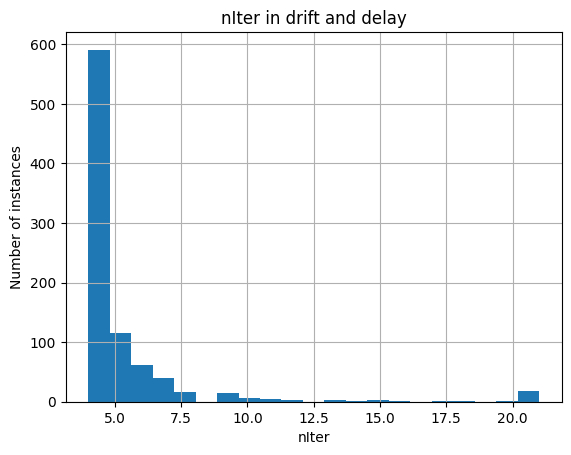

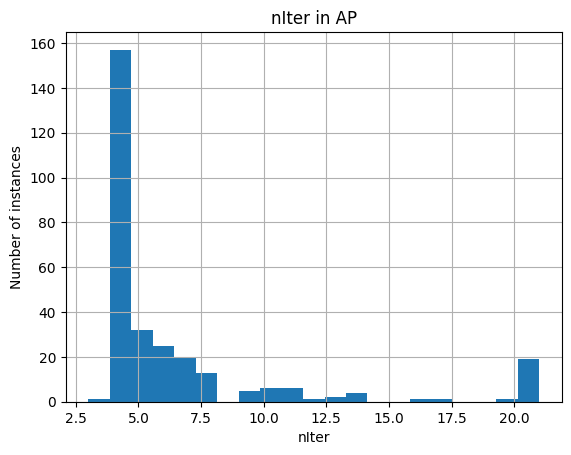

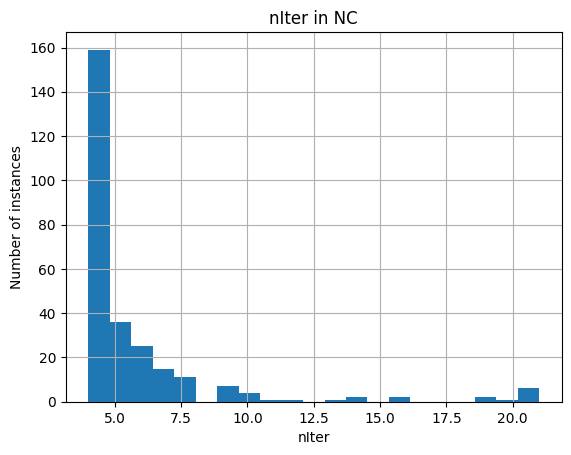

In [ ]:
ax = pdDD.hist(column="nIter", bins=21)
ax[0][0].set_xlabel('nIter')
ax[0][0].set_ylabel('Number of instances')
ax[0][0].set_title('nIter in drift and delay')

# Generate histograms for pdAP and pdNC
ax_ap = pdAP.hist(column="nIter", bins=21)
ax_ap[0][0].set_xlabel('nIter')
ax_ap[0][0].set_ylabel('Number of instances')
ax_ap[0][0].set_title('nIter in AP')

ax_nc = pdNC.hist(column="nIter", bins=21)
ax_nc[0][0].set_xlabel('nIter')
ax_nc[0][0].set_ylabel('Number of instances')
ax_nc[0][0].set_title('nIter in NC')
# Save the figure
fig_dd = ax[0][0].get_figure()
fig_dd.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/nIter_histogram_DD.png')

fig_ap = ax_ap[0][0].get_figure()
fig_ap.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/nIter_histogram_AP.png')

fig_nc = ax_nc[0][0].get_figure()
fig_nc.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/nIter_histogram_NC.png')

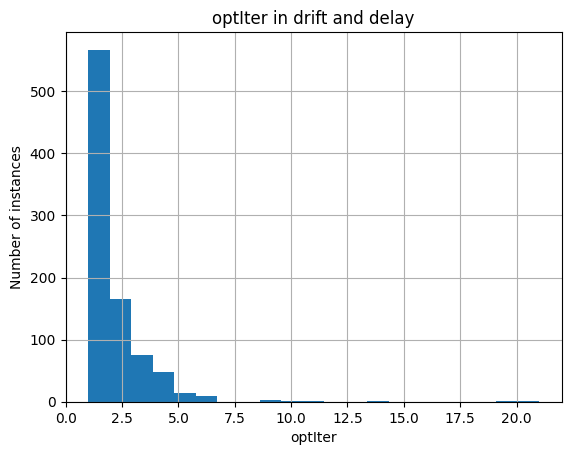

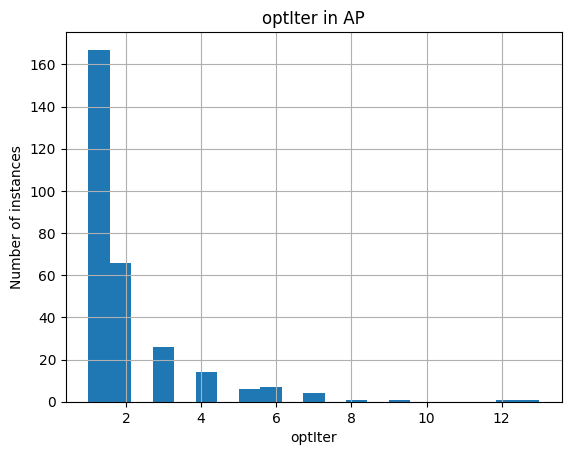

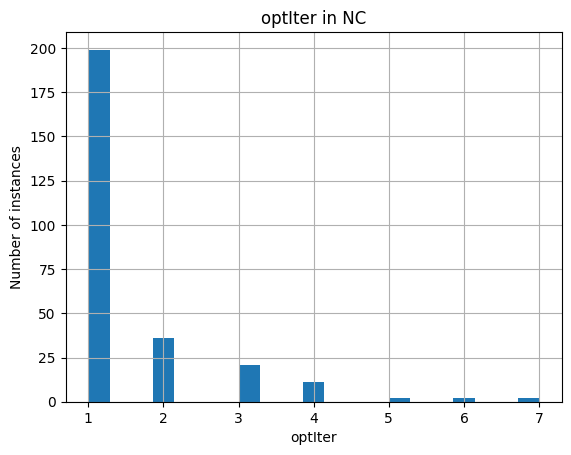

In [ ]:
ax = pdDD.hist(column="optIter", bins=21)
ax[0][0].set_xlabel('optIter')
ax[0][0].set_ylabel('Number of instances')
ax[0][0].set_title('optIter in drift and delay')

# Generate histograms for pdAP and pdNC
ax_ap = pdAP.hist(column="optIter", bins=21)
ax_ap[0][0].set_xlabel('optIter')
ax_ap[0][0].set_ylabel('Number of instances')
ax_ap[0][0].set_title('optIter in AP')

ax_nc = pdNC.hist(column="optIter", bins=21)
ax_nc[0][0].set_xlabel('optIter')
ax_nc[0][0].set_ylabel('Number of instances')
ax_nc[0][0].set_title('optIter in NC')
# Save the figure
fig_dd = ax[0][0].get_figure()
fig_dd.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/optIter_histogram_DD.png')

fig_ap = ax_ap[0][0].get_figure()
fig_ap.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/optIter_histogram_AP.png')

fig_nc = ax_nc[0][0].get_figure()
fig_nc.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/optIter_histogram_NC.png')

In [ ]:
display(pdAP[pdAP["timeLim"]!=30])
display(pdNC[pdNC["timeLim"]!=30])
print(pdDD[pdDD["timeLim"]!=30].to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",caption="Instances with augmented time limit", label="table:heuristic:overTimeLimit").replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline'))


,instance,timeLim,opt,totalTime,bestTime,nIter,optIter


,instance,timeLim,opt,totalTime,bestTime,nIter,optIter


\begin{longtable}{|l|r|r|r|r|r|r|}
\caption{Instances with augmented time limit} \label{table:heuristic:overTimeLimit} \\ \hline

instance & timeLim & opt & totalTime & bestTime & nIter & optIter \\ \hline

\endfirsthead
\caption[]{Instances with augmented time limit} \\ \hline

instance & timeLim & opt & totalTime & bestTime & nIter & optIter \\ \hline

\endhead

\multicolumn{7}{r}{Continued on next page} \\ \hline

\endfoot

\endlastfoot
metroplex53nDr0nDe2 & 240 & 21.418546 & 358.795575 & 358.723880 & 6 & 6 \\ \hline
metroplex63nDr0nDe3 & 360 & 458.553864 & 1436.318366 & 1436.271662 & 21 & 21 \\ \hline
\end{longtable}

